# Quick Start (Eigen Cation)

## 1. Install and Satisfy requirements

See [documenstaion](https://kenhino.github.io/PyVibLocalizer/README.html).

## 2. Import modules

In [1]:
import mendeleev
import numpy as np
import scipy

In [2]:
try:
    import bpy
except ImportError:
    print('You cannot use Blender in Jupyter')
    print('You must select jupyter kernel as blender when you use blender')
    import mendeleev
import matplotlib
try:
    import ase
    import ase.db
except ImportError:
    print('You cannot use ASE')

You cannot use Blender in Jupyter
You must select jupyter kernel as blender when you use blender


In [3]:
try:
    import pyvib
except ImportError:
    print('Try execute in `src` directory or set $PYTHONPATH to pyvib')

## 3. Prepare Geometry
Define
- atom element
- coordinate

For example,
```python
geom = [['C', (0.0, 0.0, 0.0)],
        ['H', (1,0, 1.0, 1.0)]]
```

Here, I use pre-calculated coordinate.

In [10]:
geom, mw_hess = pyvib.read_fchk_g16('./sample/eigen.fchk')

In [11]:
geom

[['O', (-4.57284776, 0.68207695, 0.320466621)],
 ['H', (-5.8818443, 0.81739346, -0.957684805)],
 ['H', (-5.14539881, 1.7229147, 1.71690376)],
 ['O', (2.87724227, 3.61878313, 0.32033963)],
 ['H', (3.64938057, 4.68466587, -0.957609826)],
 ['H', (4.06472225, 3.59373265, 1.71693115)],
 ['O', (-0.000131179955, -2.09370874e-06, -1.06839293)],
 ['H', (-1.80158403, 0.354774491, -0.473124045)],
 ['H', (1.20781297, 1.38299864, -0.473643077)],
 ['H', (0.593629706, -1.73762711, -0.473567918)],
 ['O', (1.69577339, -4.30083358, 0.320266918)],
 ['H', (2.23110504, -5.50313834, -0.957754266)],
 ['H', (1.08188283, -5.31590964, 1.71810709)]]

## 4. Prepate mass-wighted hessian

Define
- mass-weighted hessian (unit is a.u.)

Mass-weighted hessian is matrix $M_{ij}=\frac{\partial^2 E}{\partial\sqrt{m_i}x_i\partial\sqrt{m_j}x_j}$ of the second derivative of energy $E$ in terms of mw coordinates $\sqrt{m_i}x_i$. You can also obtain mw-hessian from harmonic frequency and displacement vectors.

You can use `pyvib.read_minfo()` for [SINDO](https://tms.riken.jp/research/software/sindo/) or `pyvib.read_fchk_g16()` for [Gaussian16](https://gaussian.com/gaussian16/)

In [12]:
mw_hess

array([[ 1.41484739e-05, -4.97294794e-06,  4.09174906e-06, ...,
        -6.59478331e-08,  1.63602856e-08,  5.23460516e-08],
       [-4.97294794e-06,  6.50689658e-06,  7.07259661e-06, ...,
        -5.66803626e-08,  1.57047551e-08, -1.80738323e-08],
       [ 4.09174906e-06,  7.07259661e-06,  1.97896594e-05, ...,
         4.37221135e-08, -4.17185718e-08, -4.92465196e-08],
       ...,
       [-6.59478331e-08, -5.66803626e-08,  4.37221135e-08, ...,
         3.50157237e-05,  4.45433319e-05, -7.70477604e-05],
       [ 1.63602856e-08,  1.57047551e-08, -4.17185718e-08, ...,
         4.45433319e-05,  9.96013363e-05, -1.05977045e-04],
       [ 5.23460516e-08, -1.80738323e-08, -4.92465196e-08, ...,
        -7.70477604e-05, -1.05977045e-04,  1.77547721e-04]])

In [13]:
mw_hess.shape

(39, 39)

## 5. Set PyViblocalizer
- Set geometry and (hessian or (displacement vector and frequency))
- Input units can be specified in options, such as `unit_mass='AMU'` 

In large system, it may takes a few minutes

In [14]:
vib = pyvib.Vibration(geom, mw_hess=np.array(mw_hess), 
                      unit_xyz='bohr', unit_mass='AMU')

/Users/hinom/GitHub/PyVibLocalizer/src/local_cls.py:150: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(np.diag(self.unitary.T@self.mw_hess@self.unitary).tolist()))


## 6.1. Visualize in Tkinter+matplotlib

## 6.2. Visualize in Blender

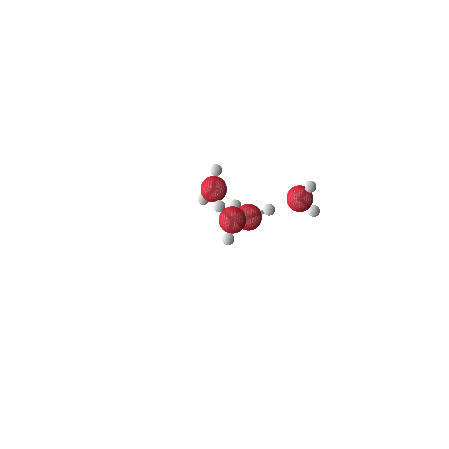

In [15]:
try:
    import bpy
    vib.visualize(blender=True)
except ImportError:
    '''Not recommended'''
    vib.visualize(blender=False)

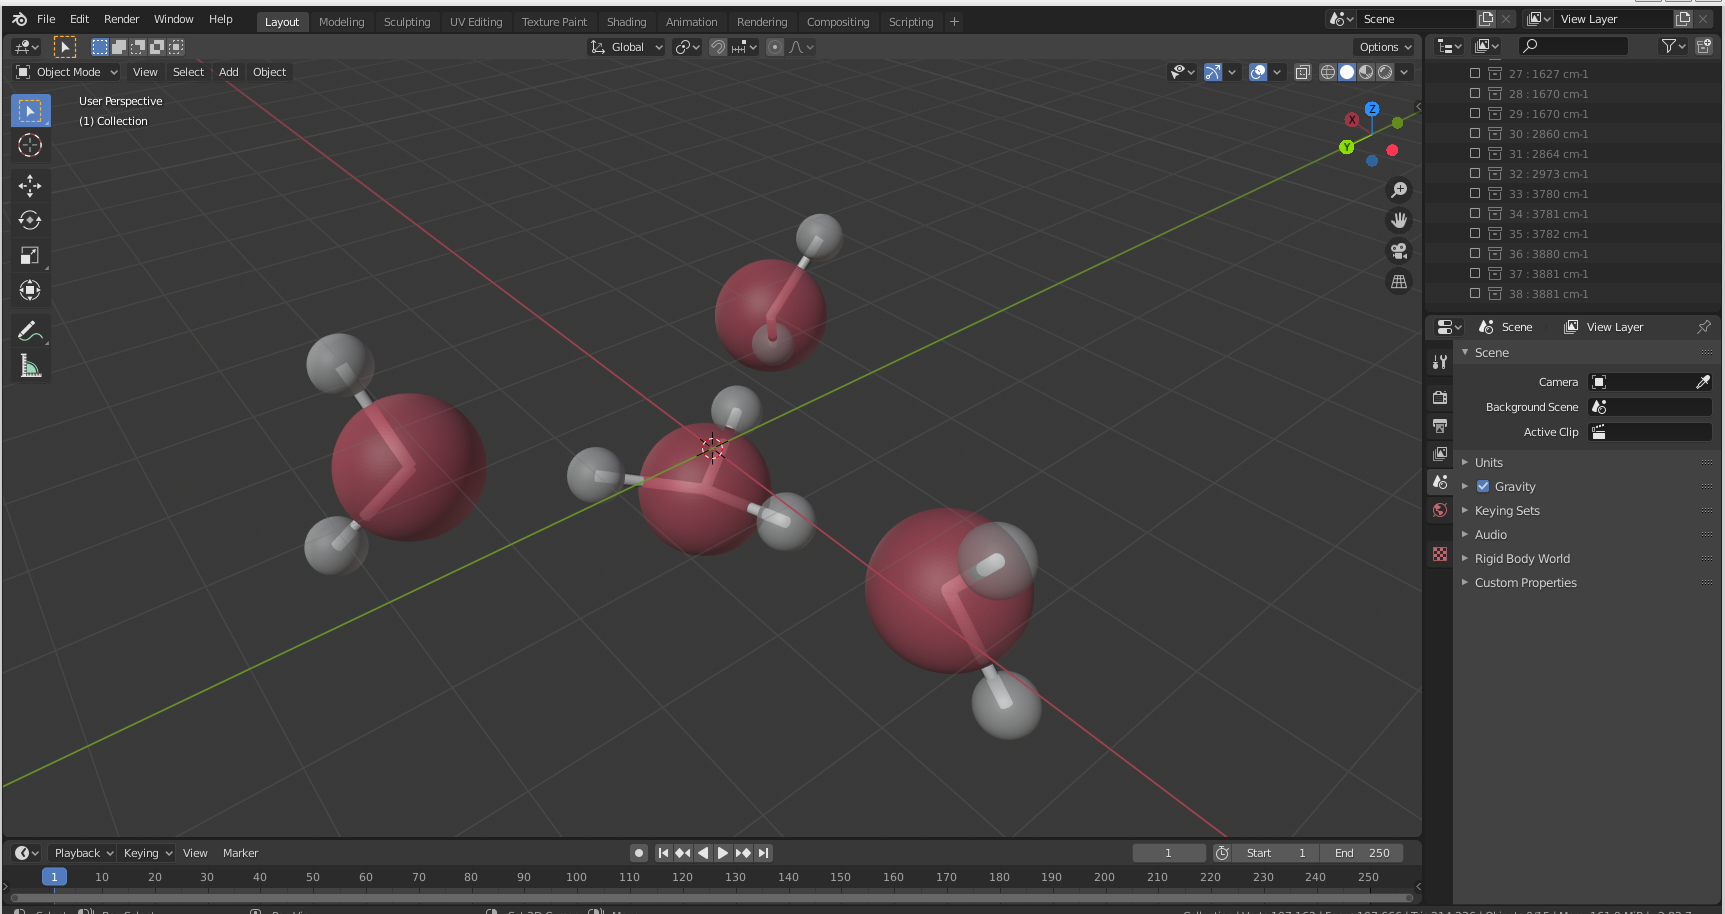

## 7. Localization

## 7.1 Group Localization

In [16]:
unitary, freq = vib.group_localize(domain=[[0,1,2],[3,4,5],[6,7,8,9],[10,11,12]], mw_hess=mw_hess, unit_mass='AMU')

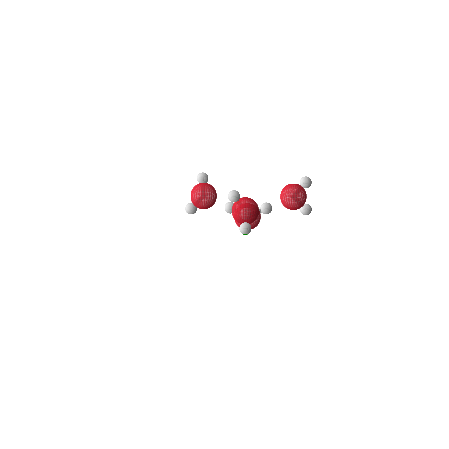

In [17]:
try:
    import bpy
    vib.visualize(blender=True)
except ImportError:
    vib.visualize(blender=False)

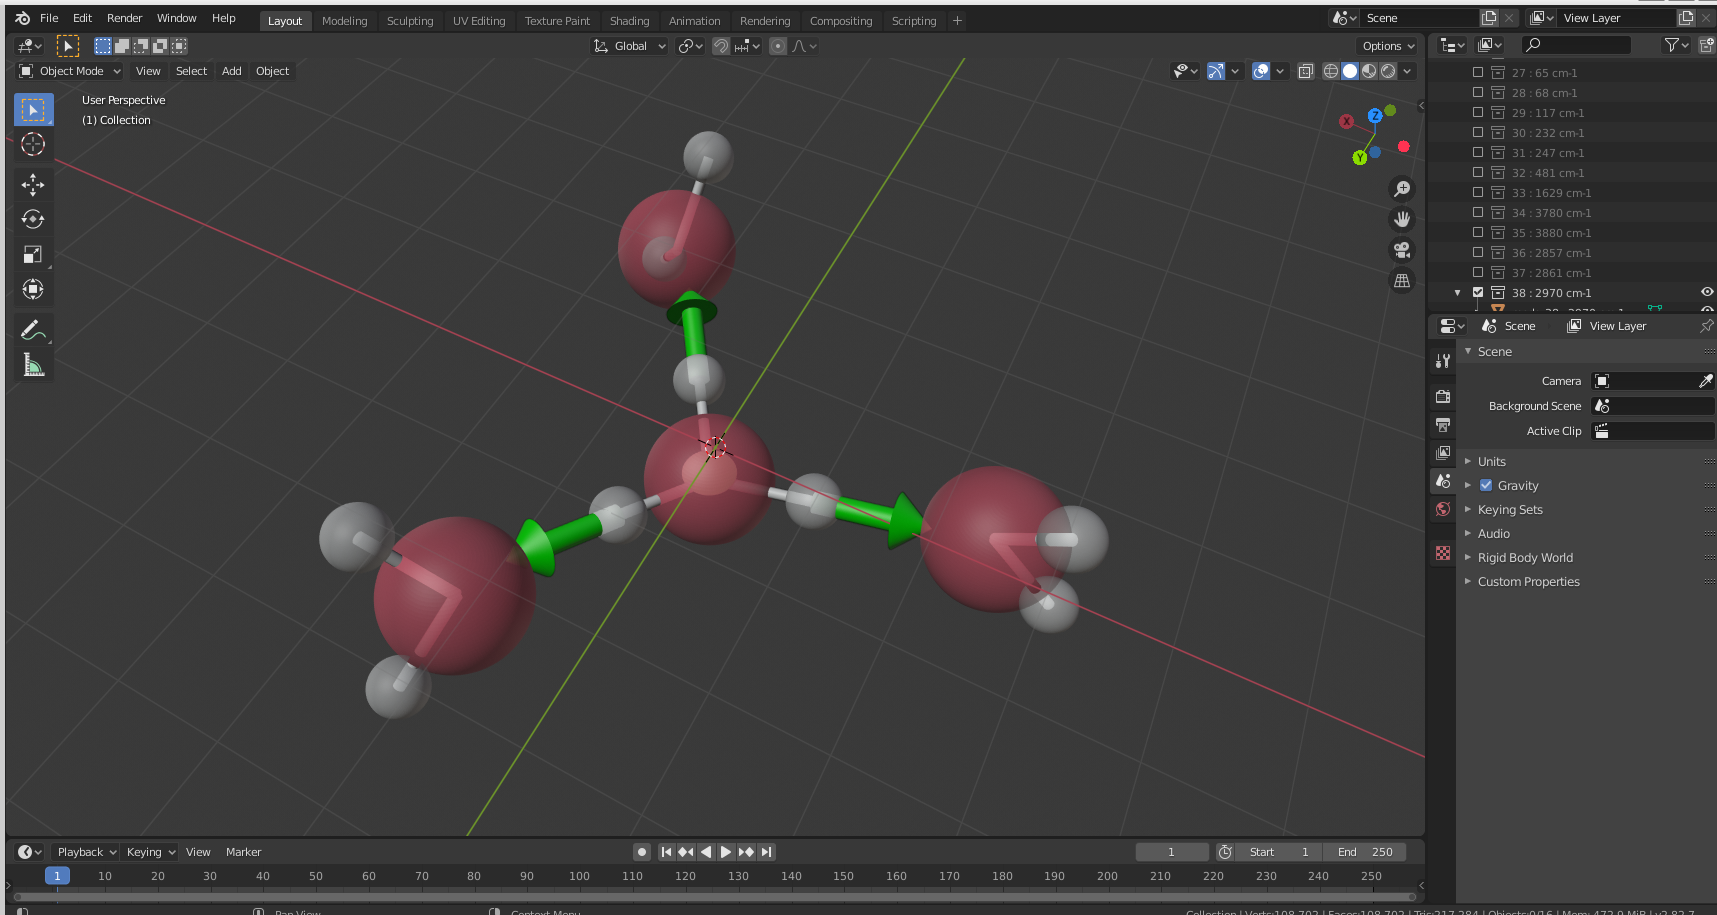

## 7.2. Metric Localization

In [9]:
_ = vib.localize(option='Boys', window= 500)

NameError: name 'vib' is not defined

In [11]:
try:
    import bpy
    vib.visualize(blender=True)
except ImportError:
    vib.visualize(blender=False)